In [ ]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from keras.applications.vgg16 import preprocess_input
from keras.layers import Lambda, Conv2D, Dense, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from sklearn.metrics import f1_score, classification_report, confusion_matrix

**Stratified 5-Fold Cross-Validation**

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Fetching CSV file of Statistical Features
statFeatures = pd.read_csv("/content/drive/MyDrive/Final Project - Fall 2021/FF_stat_feat.csv")
statData = statFeatures[:15380]

# Considering only ZeroCrossingsRate to MFCC19 feature column
statData1 = statData.loc[:, 'ZeroCrossingsRate':'MFCC19']
Stat_labels = statData.loc[:, 'FFClassLabels']

# Initialize StraitifiedKFold to split data into 5-fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Splitting and Saving 5-fold into 5 separate files using StratifiedKFold for Statistical Features
i=0
for trainId, testId in kfold.split(statData1, Stat_labels):
  trainStatData, testStatData = statData1.loc[trainId], statData1.loc[testId]
  trainStatLabels, testStatLabels = Stat_labels.loc[trainId], Stat_labels.loc[testId]
  np.save("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainStatData_"+str(i)+".npy", trainStatData)
  np.save("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainStatLabels_"+str(i)+".npy", trainStatLabels)
  np.save("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testStatData_"+str(i)+".npy", testStatData)
  np.save("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testStatLabels_"+str(i)+".npy", testStatLabels)
  i = i + 1

# Laoding all 4 chunk files of visual features and labels and concatenate it into single variable
visLabels = np.array(np.concatenate((np.load("/content/drive/MyDrive/Final Project - Fall 2021/FF Visual Feat 2 RGB/labels_0.npy"), np.load("/content/drive/MyDrive/Final Project - Fall 2021/FF Visual Feat 2 RGB/labels_1.npy"), np.load("/content/drive/MyDrive/Final Project - Fall 2021/FF Visual Feat 2 RGB/labels_2.npy"), np.load("/content/drive/MyDrive/Final Project - Fall 2021/FF Visual Feat 2 RGB/labels_3.npy"))), dtype=np.uint8)
visFeatures = np.concatenate((np.load("/content/drive/MyDrive/Final Project - Fall 2021/FF Visual Feat 2 RGB/vis_feat_0.npy"), np.load("/content/drive/MyDrive/Final Project - Fall 2021/FF Visual Feat 2 RGB/vis_feat_1.npy"), np.load("/content/drive/MyDrive/Final Project - Fall 2021/FF Visual Feat 2 RGB/vis_feat_2.npy"), np.load("/content/drive/MyDrive/Final Project - Fall 2021/FF Visual Feat 2 RGB/vis_feat_3.npy")))

# Splitting and Saving 5-fold into 5 separate files using StratifiedKFold for Visual Features
i=0
for trainId, testId in kfold.split(visFeatures, visLabels):
  trainVisData, testVisData = visFeatures[trainId], visFeatures[testId]
  trainVisLabels, testVisLabels = visLabels[trainId], visLabels[testId]
  np.save("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_"+str(i)+".npy", trainVisData)
  np.save("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_"+str(i)+".npy", trainVisLabels)
  np.save("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_"+str(i)+".npy", testVisData)
  np.save("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_"+str(i)+".npy", testVisLabels)
  i = i + 1

del visFeatures
del visLabels

**5-Fold Cross-validation for Statistical Features Model - MLP(ANN)**

================================== K Fold : 0 ==================================
Epoch 1/50
385/385 [==============================] - 2s 5ms/step - loss: 0.4715 - accuracy: 0.7897 - val_loss: 0.4527 - val_accuracy: 0.8001
Epoch 2/50
385/385 [==============================] - 2s 5ms/step - loss: 0.4188 - accuracy: 0.8210 - val_loss: 0.4213 - val_accuracy: 0.8160
Epoch 3/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3941 - accuracy: 0.8323 - val_loss: 0.4224 - val_accuracy: 0.8332
Epoch 4/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3750 - accuracy: 0.8396 - val_loss: 0.4179 - val_accuracy: 0.8300
Epoch 5/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3613 - accuracy: 0.8477 - val_loss: 0.4000 - val_accuracy: 0.8365
Epoch 6/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3441 - accuracy: 0.8548 - val_loss: 0.4179 - val_accuracy: 0.8303
Epoch 7/50
385/385 [==============================] - 2s 5ms/step -

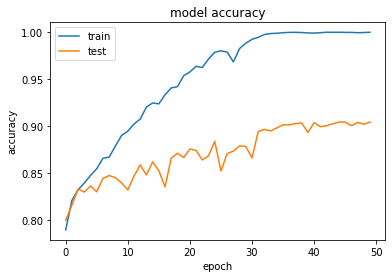

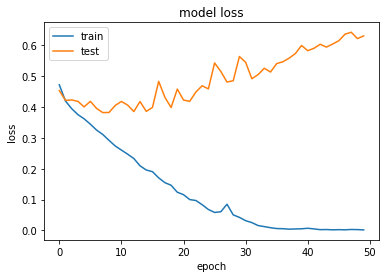

385/385 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 0.9998
Training Accuracy: 99.98
97/97 [==============================] - 0s 2ms/step - loss: 0.6296 - accuracy: 0.9044
Testing Accuracy: 90.44
================================== K Fold : 1 ==================================
Epoch 1/50
385/385 [==============================] - 2s 5ms/step - loss: 0.4714 - accuracy: 0.7930 - val_loss: 0.4356 - val_accuracy: 0.8150
Epoch 2/50
385/385 [==============================] - 2s 5ms/step - loss: 0.4195 - accuracy: 0.8197 - val_loss: 0.4154 - val_accuracy: 0.8267
Epoch 3/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3986 - accuracy: 0.8300 - val_loss: 0.3951 - val_accuracy: 0.8300
Epoch 4/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3806 - accuracy: 0.8379 - val_loss: 0.3872 - val_accuracy: 0.8391
Epoch 5/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3636 - accuracy: 0.8455 - val_loss: 0.3952 - val_a

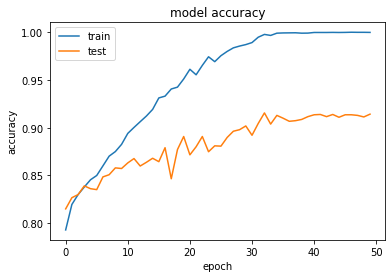

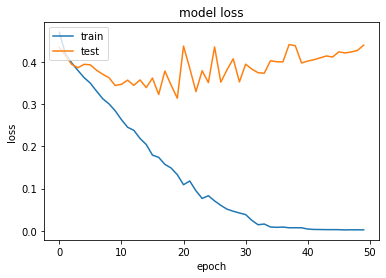

385/385 [==============================] - 1s 3ms/step - loss: 0.0015 - accuracy: 0.9998
Training Accuracy: 99.98
97/97 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.9142
Testing Accuracy: 91.42
================================== K Fold : 2 ==================================
Epoch 1/50
385/385 [==============================] - 2s 6ms/step - loss: 0.4708 - accuracy: 0.7910 - val_loss: 0.4402 - val_accuracy: 0.8105
Epoch 2/50
385/385 [==============================] - 2s 5ms/step - loss: 0.4182 - accuracy: 0.8205 - val_loss: 0.4359 - val_accuracy: 0.8088
Epoch 3/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3953 - accuracy: 0.8344 - val_loss: 0.4133 - val_accuracy: 0.8235
Epoch 4/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3755 - accuracy: 0.8422 - val_loss: 0.4074 - val_accuracy: 0.8209
Epoch 5/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3569 - accuracy: 0.8514 - val_loss: 0.4099 - val_a

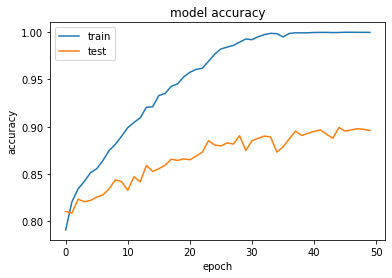

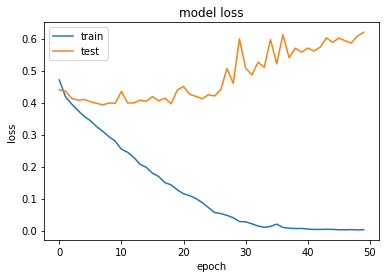

385/385 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 0.9998
Training Accuracy: 99.98
97/97 [==============================] - 0s 2ms/step - loss: 0.6198 - accuracy: 0.8960
Testing Accuracy: 89.60
================================== K Fold : 3 ==================================
Epoch 1/50
385/385 [==============================] - 2s 5ms/step - loss: 0.4701 - accuracy: 0.7918 - val_loss: 0.4452 - val_accuracy: 0.8147
Epoch 2/50
385/385 [==============================] - 2s 5ms/step - loss: 0.4181 - accuracy: 0.8208 - val_loss: 0.4205 - val_accuracy: 0.8274
Epoch 3/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3940 - accuracy: 0.8305 - val_loss: 0.4096 - val_accuracy: 0.8329
Epoch 4/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3753 - accuracy: 0.8406 - val_loss: 0.4288 - val_accuracy: 0.8225
Epoch 5/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3586 - accuracy: 0.8473 - val_loss: 0.3962 - val_a

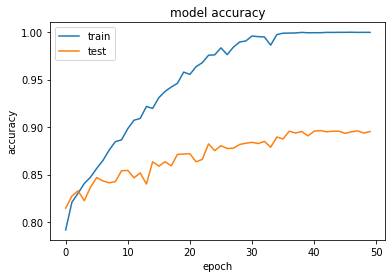

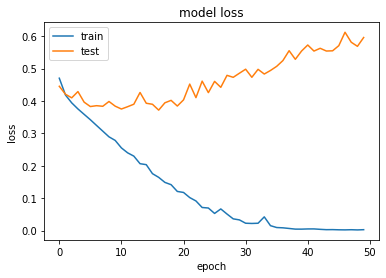

385/385 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9998
Training Accuracy: 99.98
97/97 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.8953
Testing Accuracy: 89.53
================================== K Fold : 4 ==================================
Epoch 1/50
385/385 [==============================] - 3s 6ms/step - loss: 0.4719 - accuracy: 0.7890 - val_loss: 0.4369 - val_accuracy: 0.8072
Epoch 2/50
385/385 [==============================] - 2s 5ms/step - loss: 0.4217 - accuracy: 0.8189 - val_loss: 0.4102 - val_accuracy: 0.8290
Epoch 3/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3988 - accuracy: 0.8309 - val_loss: 0.4015 - val_accuracy: 0.8326
Epoch 4/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3810 - accuracy: 0.8366 - val_loss: 0.3953 - val_accuracy: 0.8274
Epoch 5/50
385/385 [==============================] - 2s 5ms/step - loss: 0.3632 - accuracy: 0.8479 - val_loss: 0.3962 - val_a

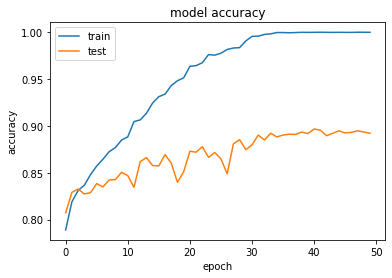

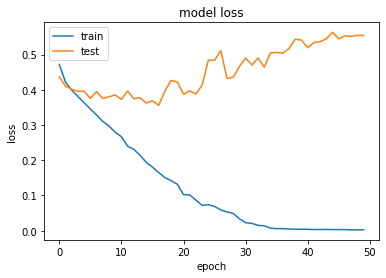

385/385 [==============================] - 1s 3ms/step - loss: 0.0018 - accuracy: 0.9998
Training Accuracy: 99.98
97/97 [==============================] - 0s 3ms/step - loss: 0.5540 - accuracy: 0.8921
Testing Accuracy: 89.21


In [ ]:
# Variables to store training and testing accuracy of 5-fold
train_acc = np.zeros(5)
test_acc = np.zeros(5)

# 5-fold cross-validation
for i in range(5):

  print("================================== K Fold :",i,"==================================")

  # Loading data for fold
  trainStatData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainStatData_"+str(i)+".npy")
  trainStatLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainStatLabels_"+str(i)+".npy")
  testStatData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testStatData_"+str(i)+".npy")
  testStatLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testStatLabels_"+str(i)+".npy")
  
  # Applying standard scaling
  scaler = StandardScaler()
  scaler.fit(trainStatData)
  trainStatData = scaler.transform(trainStatData)
  testStatData = scaler.transform(testStatData)

  # MLP(ANN) Model
  model = Sequential()
  model.add(Dense(4096, input_dim=25, activation='relu'))
  model.add(Dense(2048, activation='relu'))
  model.add(Dense(1024, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Initialize Optimizer 
  opt = tf.keras.optimizers.SGD(learning_rate = 0.01, decay = 0.0001, momentum = 0.9)
  
  # Compiling model
  model.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

  # Model Training
  history = model.fit(trainStatData, trainStatLabels, epochs = 50, batch_size = 32, validation_data = (testStatData, testStatLabels))

  # Plotting history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Plotting history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  # Calculating Training Accuracy
  _, train_acc[i] = model.evaluate(trainStatData, trainStatLabels)
  print('Training Accuracy: %.2f' % (train_acc[i]*100))

  # Calculating Testing Accuracy
  _, test_acc[i] = model.evaluate(testStatData, testStatLabels)
  print('Testing Accuracy: %.2f' % (test_acc[i]*100))

  # Saving the model fold wise
  model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_stat_CV'+str(i)+'.h5')

In [ ]:
# Printing Average Training and Testing after 5-fold cross-validation
print("After 5 Fold cross validation")
print("Average Training Accuracy : ",np.average(train_acc)*100)
print("Average Testing  Accuracy : ",np.average(test_acc)*100)

After 5 Fold cross validation
Average Training Accuracy :  99.9804937839508
Average Testing  Accuracy :  90.0390112400055


**5-fold Cross-validation for Custom CNN Model - Visual Features**

In [ ]:
from keras.applications.vgg16 import preprocess_input

def CustCNNModel():

  # Building a custom CNN model
  model = Sequential()

  # Lambda Layer for Preprocessing
  model.add(Lambda(lambda x: preprocess_input(x), input_shape=(128, 431, 3), name="preprocessing"))

  # Block 1:- 1-Convolution Layers, 1-MaxPooling Layer & 1-BatchNormalization Layer
  model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())

  # Block 2:- 1-Convolution Layers, 1-MaxPooling Layer & 1-BatchNormalization Layer
  model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())

  # Block 3:- 2-Convolution Layers, 1-MaxPooling Layer & 1-BatchNormalization Layer
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())

  # Block 4:- 2-Convolution Layers, 1-MaxPooling Layer & 1-BatchNormalization Layer
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())

  # Block 5:- 2-Convolution Layers, 1-MaxPooling Layer & 1-BatchNormalization Layer
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization())

  # Global average pooling Layer
  model.add(GlobalAveragePooling2D(name='globalaveragepooling'))

  # FC1 Layer
  model.add(Dense(1024, activation='relu', name='fc1'))

  # FC2 Layer
  model.add(Dense(512, activation='relu', name='fc2'))

  # Output Layer
  model.add(Dense(1, activation='sigmoid', name='output'))

  # Model compiled using SGD Optimizier
  model.compile(loss='binary_crossentropy', optimizer = SGD(learning_rate=0.001, momentum=0.9, decay=0.00001), metrics = ['accuracy'])

  return model

================================== K Fold : 0 ==================================
Epoch 1/30
385/385 [==============================] - 76s 161ms/step - loss: 0.4644 - accuracy: 0.8001 - val_loss: 0.4751 - val_accuracy: 0.7858
Epoch 2/30
385/385 [==============================] - 60s 155ms/step - loss: 0.3746 - accuracy: 0.8506 - val_loss: 0.3750 - val_accuracy: 0.8534
Epoch 3/30
385/385 [==============================] - 59s 154ms/step - loss: 0.3390 - accuracy: 0.8686 - val_loss: 0.3642 - val_accuracy: 0.8628
Epoch 4/30
385/385 [==============================] - 59s 153ms/step - loss: 0.3044 - accuracy: 0.8856 - val_loss: 0.3050 - val_accuracy: 0.8852
Epoch 5/30
385/385 [==============================] - 59s 153ms/step - loss: 0.2885 - accuracy: 0.8904 - val_loss: 0.3296 - val_accuracy: 0.8810
Epoch 6/30
385/385 [==============================] - 59s 154ms/step - loss: 0.2628 - accuracy: 0.9035 - val_loss: 0.3520 - val_accuracy: 0.8703
Epoch 7/30
385/385 [=============================

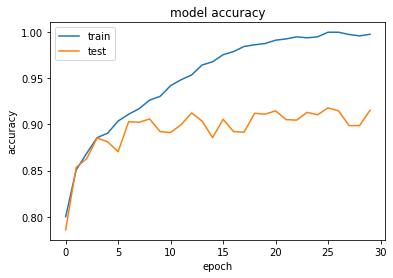

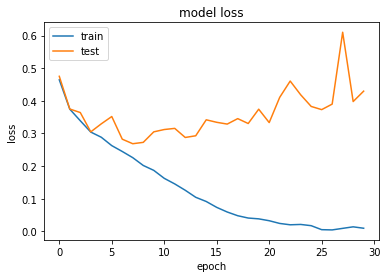

385/385 [==============================] - 18s 46ms/step - loss: 0.0068 - accuracy: 0.9985
Training Accuracy: 99.85
97/97 [==============================] - 4s 45ms/step - loss: 0.4297 - accuracy: 0.9151
Testing Accuracy: 91.51


In [ ]:
print("================================== K Fold : 0 ==================================")

# Loading visual features of training and testing data and labels for Fold-0
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_0.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_0.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_0.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_0.npy")

# Custom CNN Model Training for Fold-0
Cust_model = CustCNNModel()
history  = Cust_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-0
_, train_acc = Cust_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = Cust_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-0
Cust_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_Cust_CV0.h5')

================================== K Fold : 1 ==================================
Epoch 1/30
385/385 [==============================] - 75s 158ms/step - loss: 0.4622 - accuracy: 0.8008 - val_loss: 0.4486 - val_accuracy: 0.7981
Epoch 2/30
385/385 [==============================] - 60s 155ms/step - loss: 0.3778 - accuracy: 0.8477 - val_loss: 0.4530 - val_accuracy: 0.7965
Epoch 3/30
385/385 [==============================] - 59s 154ms/step - loss: 0.3433 - accuracy: 0.8659 - val_loss: 0.3200 - val_accuracy: 0.8810
Epoch 4/30
385/385 [==============================] - 60s 155ms/step - loss: 0.3117 - accuracy: 0.8805 - val_loss: 0.3356 - val_accuracy: 0.8810
Epoch 5/30
385/385 [==============================] - 59s 154ms/step - loss: 0.2906 - accuracy: 0.8891 - val_loss: 0.3143 - val_accuracy: 0.8826
Epoch 6/30
385/385 [==============================] - 59s 154ms/step - loss: 0.2674 - accuracy: 0.9002 - val_loss: 0.2978 - val_accuracy: 0.8911
Epoch 7/30
385/385 [=============================

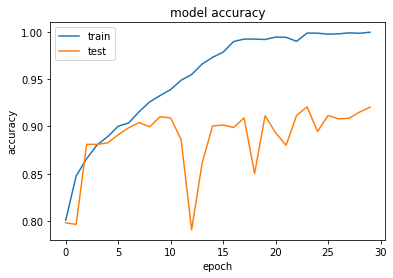

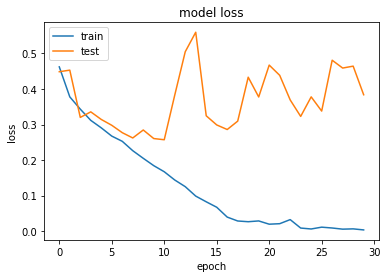

385/385 [==============================] - 18s 46ms/step - loss: 0.0013 - accuracy: 0.9998
Training Accuracy: 99.98
97/97 [==============================] - 5s 46ms/step - loss: 0.3838 - accuracy: 0.9204
Testing Accuracy: 92.04


In [ ]:
print("================================== K Fold : 1 ==================================")

# Loading visual features of training and testing data and labels for Fold-1
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_1.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_1.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_1.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_1.npy")

# Custom CNN Model Training for Fold-1
Cust_model = CustCNNModel()
history  = Cust_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculcating Training and Testing Accuracy for Fold-1
_, train_acc = Cust_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = Cust_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-1
Cust_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_Cust_CV1.h5')

================================== K Fold : 2 ==================================
Epoch 1/30
385/385 [==============================] - 75s 150ms/step - loss: 0.4625 - accuracy: 0.7990 - val_loss: 0.4856 - val_accuracy: 0.7965
Epoch 2/30
385/385 [==============================] - 55s 144ms/step - loss: 0.3744 - accuracy: 0.8509 - val_loss: 0.4232 - val_accuracy: 0.8196
Epoch 3/30
385/385 [==============================] - 56s 146ms/step - loss: 0.3331 - accuracy: 0.8734 - val_loss: 0.3668 - val_accuracy: 0.8540
Epoch 4/30
385/385 [==============================] - 57s 148ms/step - loss: 0.3089 - accuracy: 0.8826 - val_loss: 0.3450 - val_accuracy: 0.8641
Epoch 5/30
385/385 [==============================] - 57s 149ms/step - loss: 0.2858 - accuracy: 0.8921 - val_loss: 0.3147 - val_accuracy: 0.8768
Epoch 6/30
385/385 [==============================] - 58s 150ms/step - loss: 0.2674 - accuracy: 0.9021 - val_loss: 0.3268 - val_accuracy: 0.8722
Epoch 7/30
385/385 [=============================

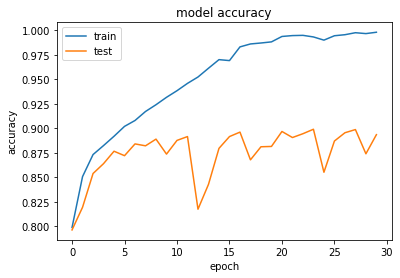

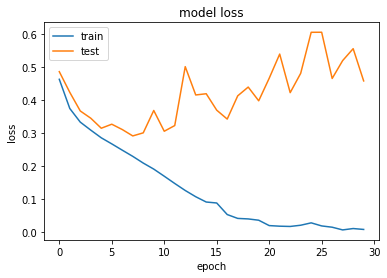

385/385 [==============================] - 17s 44ms/step - loss: 0.0025 - accuracy: 0.9997
Training Accuracy: 99.97
97/97 [==============================] - 4s 44ms/step - loss: 0.4577 - accuracy: 0.8937
Testing Accuracy: 89.37


In [ ]:
print("================================== K Fold : 2 ==================================")

# Loading visual features of training and testing data and labels for Fold-2
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_2.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_2.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_2.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_2.npy")

# Custom CNN Model Training for Fold-2
Cust_model = CustCNNModel()
history  = Cust_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-2
_, train_acc = Cust_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = Cust_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-2
Cust_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_Cust_CV2.h5')

================================== K Fold : 3 ==================================
Epoch 1/30
385/385 [==============================] - 126s 322ms/step - loss: 0.4523 - accuracy: 0.8082 - val_loss: 0.5788 - val_accuracy: 0.7630
Epoch 2/30
385/385 [==============================] - 123s 319ms/step - loss: 0.3663 - accuracy: 0.8543 - val_loss: 0.3783 - val_accuracy: 0.8540
Epoch 3/30
385/385 [==============================] - 123s 320ms/step - loss: 0.3311 - accuracy: 0.8713 - val_loss: 0.4008 - val_accuracy: 0.8482
Epoch 4/30
385/385 [==============================] - 123s 320ms/step - loss: 0.3015 - accuracy: 0.8855 - val_loss: 0.3431 - val_accuracy: 0.8706
Epoch 5/30
385/385 [==============================] - 123s 320ms/step - loss: 0.2805 - accuracy: 0.8962 - val_loss: 0.3863 - val_accuracy: 0.8521
Epoch 6/30
385/385 [==============================] - 123s 320ms/step - loss: 0.2588 - accuracy: 0.9023 - val_loss: 0.3735 - val_accuracy: 0.8670
Epoch 7/30
385/385 [=======================

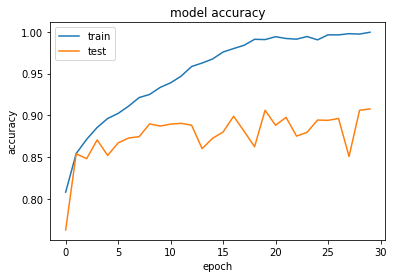

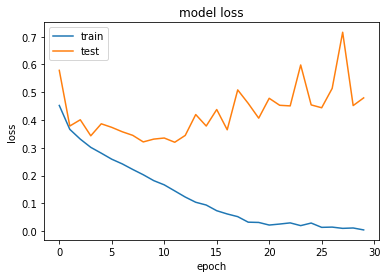

385/385 [==============================] - 37s 97ms/step - loss: 0.0028 - accuracy: 0.9995
Training Accuracy: 99.95
97/97 [==============================] - 9s 96ms/step - loss: 0.4796 - accuracy: 0.9077
Testing Accuracy: 90.77


In [ ]:
print("================================== K Fold : 3 ==================================")

# Loading visual features of training and testing data and labels for Fold-3
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_3.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_3.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_3.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_3.npy")

# Custom CNN Model Training for Fold-3
Cust_model = CustCNNModel()
history  = Cust_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-3
_, train_acc = Cust_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = Cust_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-3
Cust_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_Cust_CV3.h5')

================================== K Fold : 4 ==================================
Epoch 1/30
385/385 [==============================] - 180s 417ms/step - loss: 0.4641 - accuracy: 0.7991 - val_loss: 0.5714 - val_accuracy: 0.7666
Epoch 2/30
385/385 [==============================] - 154s 401ms/step - loss: 0.3702 - accuracy: 0.8536 - val_loss: 0.3786 - val_accuracy: 0.8602
Epoch 3/30
385/385 [==============================] - 154s 401ms/step - loss: 0.3308 - accuracy: 0.8725 - val_loss: 0.3606 - val_accuracy: 0.8566
Epoch 4/30
385/385 [==============================] - 154s 401ms/step - loss: 0.3030 - accuracy: 0.8840 - val_loss: 0.3224 - val_accuracy: 0.8794
Epoch 5/30
385/385 [==============================] - 163s 425ms/step - loss: 0.2826 - accuracy: 0.8929 - val_loss: 0.3122 - val_accuracy: 0.8895
Epoch 6/30
385/385 [==============================] - 154s 400ms/step - loss: 0.2548 - accuracy: 0.9061 - val_loss: 0.3248 - val_accuracy: 0.8791
Epoch 7/30
385/385 [=======================

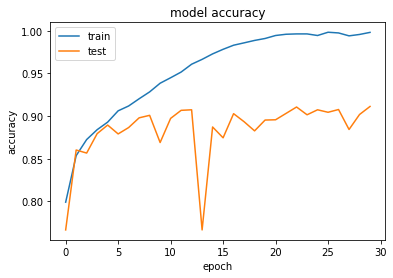

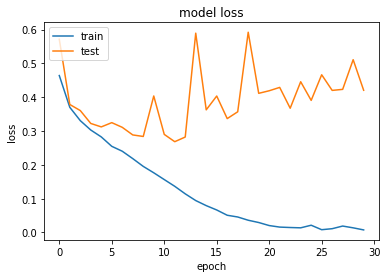

385/385 [==============================] - 46s 120ms/step - loss: 0.0019 - accuracy: 0.9998
Training Accuracy: 99.98
97/97 [==============================] - 12s 119ms/step - loss: 0.4206 - accuracy: 0.9112
Testing Accuracy: 91.12


In [ ]:
print("================================== K Fold : 4 ==================================")

# Loading visual features of training and testing data and labels for Fold-4
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_4.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_4.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_4.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_4.npy")

# Custom CNN Model Training for Fold-4
Cust_model = CustCNNModel()
history  = Cust_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-4
_, train_acc = Cust_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = Cust_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-4
Cust_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_Cust_CV4.h5')

**5-fold Cross-validation for Modified VGG Model - Visual Features**

In [ ]:
from keras.applications.vgg16 import preprocess_input

# Modified the VGG16 Model
def VGG16Model():
  
  input_layer = keras.Input(shape = (128,431,3))
  # Lambda layer for Preprocessing
  preprocess = keras.layers.Lambda(lambda x: preprocess_input(x), name='preprocess')(input_layer)
  
  # VGG16
  layer_1 = VGG16(include_top = False, weights = "imagenet")(preprocess)
  
  # Global average pooling Layer
  average = tf.keras.layers.GlobalAveragePooling2D()(layer_1)
  
  # Dense Layer
  dense = tf.keras.layers.Dense(512, activation='relu')(average)
  
  # Output Layer
  output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

  model = tf.keras.Model(inputs = input_layer, outputs = output)

  # Model complied using SGD Optimizer
  opt = tf.keras.optimizers.SGD(learning_rate = 0.001, decay = 1e-5, momentum = 0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

================================== K Fold : 0 ==================================
Epoch 1/30
385/385 [==============================] - 228s 491ms/step - loss: 0.3710 - accuracy: 0.8601 - val_loss: 0.4467 - val_accuracy: 0.8218
Epoch 2/30
385/385 [==============================] - 189s 491ms/step - loss: 0.2846 - accuracy: 0.8973 - val_loss: 0.2675 - val_accuracy: 0.9086
Epoch 3/30
385/385 [==============================] - 189s 491ms/step - loss: 0.2522 - accuracy: 0.9090 - val_loss: 0.2618 - val_accuracy: 0.9073
Epoch 4/30
385/385 [==============================] - 189s 491ms/step - loss: 0.2252 - accuracy: 0.9204 - val_loss: 0.2578 - val_accuracy: 0.9099
Epoch 5/30
385/385 [==============================] - 189s 490ms/step - loss: 0.2072 - accuracy: 0.9276 - val_loss: 0.2926 - val_accuracy: 0.9041
Epoch 6/30
385/385 [==============================] - 188s 489ms/step - loss: 0.1898 - accuracy: 0.9316 - val_loss: 0.2644 - val_accuracy: 0.9093
Epoch 7/30
385/385 [=======================

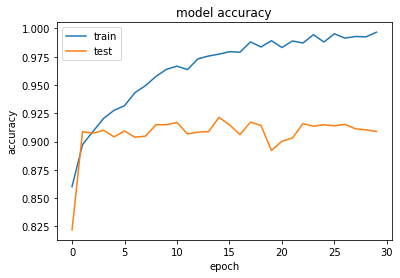

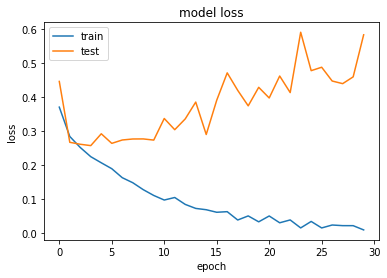

385/385 [==============================] - 55s 143ms/step - loss: 0.0075 - accuracy: 0.9978
Training Accuracy: 99.78
97/97 [==============================] - 14s 141ms/step - loss: 0.5839 - accuracy: 0.9090
Testing Accuracy: 90.90


In [ ]:
print("================================== K Fold : 0 ==================================")

# Loading visual features of training and testing data and labels for Fold-0
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_0.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_0.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_0.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_0.npy")

# Modified VGG16 Model Training for Fold-0
VGG16_model = VGG16Model()
history  = VGG16_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-0
_, train_acc = VGG16_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = VGG16_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-0
VGG16_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_VGG16_CV0.h5')

================================== K Fold : 1 ==================================
58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/30
385/385 [==============================] - 213s 500ms/step - loss: 0.4896 - accuracy: 0.7877 - val_loss: 0.3326 - val_accuracy: 0.8732
Epoch 2/30
385/385 [==============================] - 194s 503ms/step - loss: 0.3343 - accuracy: 0.8768 - val_loss: 0.2996 - val_accuracy: 0.8891
Epoch 3/30
385/385 [==============================] - 194s 503ms/step - loss: 0.2941 - accuracy: 0.8950 - val_loss: 0.2687 - val_accuracy: 0.9073
Epoch 4/30
385/385 [==============================] - 200s 520ms/step - loss: 0.2704 - accuracy: 0.9029 - val_loss: 0.2432 - val_accuracy: 0.9161
Epoch 5/30
385/385 [==============================] - 201s 521ms/step - loss: 0.2497 - accuracy: 0.9090 - val_loss: 0.2424 - val_accuracy: 0.9148
Epoch 6/30
385/385 [==============================] - 194s 504ms/step - loss: 0.2342 - accuracy: 0.9169 - val_loss: 0.2392 -

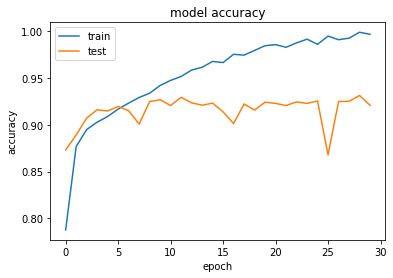

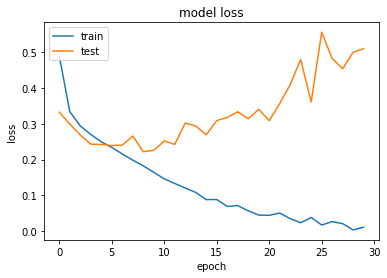

385/385 [==============================] - 57s 147ms/step - loss: 0.0056 - accuracy: 0.9985
Training Accuracy: 99.85
97/97 [==============================] - 14s 141ms/step - loss: 0.5103 - accuracy: 0.9210
Testing Accuracy: 92.10


In [ ]:
print("================================== K Fold : 1 ==================================")

# Loading visual features of training and testing data and labels for Fold-1
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_1.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_1.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_1.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_1.npy")

# Modified VGG16 Model Training for Fold-1
VGG16_model = VGG16Model()
history  = VGG16_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-1
_, train_acc = VGG16_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = VGG16_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-1
VGG16_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_VGG16_CV1.h5')

================================== K Fold : 2 ==================================
58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/30
385/385 [==============================] - 216s 507ms/step - loss: 0.3511 - accuracy: 0.8675 - val_loss: 0.2942 - val_accuracy: 0.8947
Epoch 2/30
385/385 [==============================] - 187s 487ms/step - loss: 0.2684 - accuracy: 0.9049 - val_loss: 0.2771 - val_accuracy: 0.8960
Epoch 3/30
385/385 [==============================] - 188s 489ms/step - loss: 0.2416 - accuracy: 0.9176 - val_loss: 0.2808 - val_accuracy: 0.8976
Epoch 4/30
385/385 [==============================] - 188s 490ms/step - loss: 0.2161 - accuracy: 0.9264 - val_loss: 0.2864 - val_accuracy: 0.9041
Epoch 5/30
385/385 [==============================] - 188s 488ms/step - loss: 0.1975 - accuracy: 0.9321 - val_loss: 0.2919 - val_accuracy: 0.9025
Epoch 6/30
385/385 [==============================] - 188s 489ms/step - loss: 0.1801 - accuracy: 0.9383 - val_loss: 0.2832 -

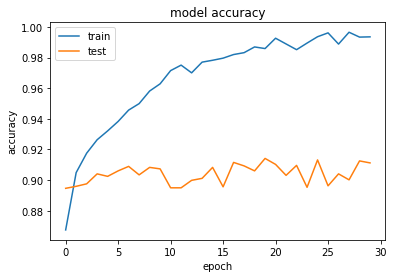

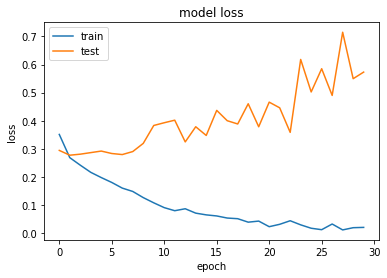

385/385 [==============================] - 56s 145ms/step - loss: 0.0048 - accuracy: 0.9980
Training Accuracy: 99.80
97/97 [==============================] - 14s 139ms/step - loss: 0.5730 - accuracy: 0.9112
Testing Accuracy: 91.12


In [ ]:
print("================================== K Fold : 2 ==================================")

# Loading visual features of training and testing data and labels for Fold-2
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_2.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_2.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_2.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_2.npy")

# Modified VGG16 Model Training for Fold-2
VGG16_model = VGG16Model()
history  = VGG16_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-2
_, train_acc = VGG16_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = VGG16_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-2
VGG16_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_VGG16_CV2.h5')

================================== K Fold : 3 ==================================
Epoch 1/30
385/385 [==============================] - 191s 494ms/step - loss: 0.3675 - accuracy: 0.8619 - val_loss: 0.3078 - val_accuracy: 0.8937
Epoch 2/30
385/385 [==============================] - 189s 491ms/step - loss: 0.2758 - accuracy: 0.8997 - val_loss: 0.2909 - val_accuracy: 0.8947
Epoch 3/30
385/385 [==============================] - 191s 496ms/step - loss: 0.2404 - accuracy: 0.9145 - val_loss: 0.2957 - val_accuracy: 0.8950
Epoch 4/30
385/385 [==============================] - 198s 515ms/step - loss: 0.2210 - accuracy: 0.9219 - val_loss: 0.2656 - val_accuracy: 0.9028
Epoch 5/30
385/385 [==============================] - 189s 491ms/step - loss: 0.1992 - accuracy: 0.9311 - val_loss: 0.2809 - val_accuracy: 0.8979
Epoch 6/30
385/385 [==============================] - 189s 491ms/step - loss: 0.1769 - accuracy: 0.9397 - val_loss: 0.2809 - val_accuracy: 0.9038
Epoch 7/30
385/385 [=======================

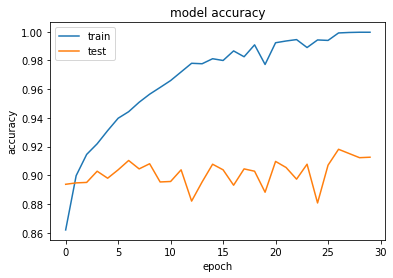

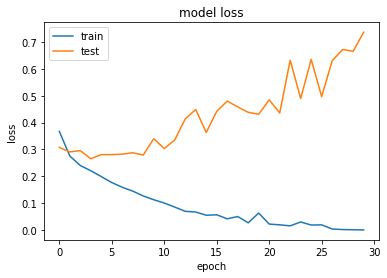

385/385 [==============================] - 56s 145ms/step - loss: 5.9605e-04 - accuracy: 0.9998
Training Accuracy: 99.98
97/97 [==============================] - 13s 138ms/step - loss: 0.7360 - accuracy: 0.9125
Testing Accuracy: 91.25


In [ ]:
print("================================== K Fold : 3 ==================================")

# Loading visual features of training and testing data and labels for Fold-3
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_3.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_3.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_3.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_3.npy")

# Modified VGG16 Model Training for Fold-3
VGG16_model = VGG16Model()
history  = VGG16_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-3
_, train_acc = VGG16_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = VGG16_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-3
VGG16_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_VGG16_CV3.h5')

================================== K Fold : 4 ==================================
58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/30
385/385 [==============================] - 213s 498ms/step - loss: 0.4682 - accuracy: 0.7998 - val_loss: 0.3597 - val_accuracy: 0.8596
Epoch 2/30
385/385 [==============================] - 187s 486ms/step - loss: 0.3284 - accuracy: 0.8768 - val_loss: 0.3080 - val_accuracy: 0.8836
Epoch 3/30
385/385 [==============================] - 187s 487ms/step - loss: 0.2850 - accuracy: 0.8979 - val_loss: 0.2802 - val_accuracy: 0.8989
Epoch 4/30
385/385 [==============================] - 187s 486ms/step - loss: 0.2661 - accuracy: 0.9050 - val_loss: 0.2677 - val_accuracy: 0.9047
Epoch 5/30
385/385 [==============================] - 188s 488ms/step - loss: 0.2503 - accuracy: 0.9093 - val_loss: 0.2513 - val_accuracy: 0.9090
Epoch 6/30
385/385 [==============================] - 187s 487ms/step - loss: 0.2361 - accuracy: 0.9175 - val_loss: 0.2545 -

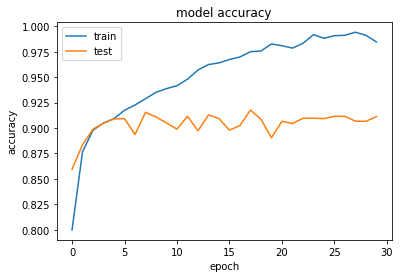

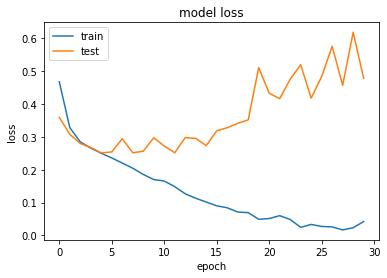

385/385 [==============================] - 55s 143ms/step - loss: 0.0087 - accuracy: 0.9974
Training Accuracy: 99.74
97/97 [==============================] - 14s 139ms/step - loss: 0.4786 - accuracy: 0.9112
Testing Accuracy: 91.12


In [ ]:
print("================================== K Fold : 4 ==================================")

# Loading visual features of training and testing data and labels for Fold-4
trainVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisData_4.npy")
trainVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/trainVisLabels_4.npy")
testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_4.npy")
testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_4.npy")

# Modified VGG16 Model Training for Fold-4
VGG16_model = VGG16Model()
history  = VGG16_model.fit(trainVisData, trainVisLabels, epochs= 30, batch_size=32, shuffle= True, validation_data=(testVisData, testVisLabels))

# Plotting history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plotting history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Calculating Training and Testing Accuracy for Fold-4
_, train_acc = VGG16_model.evaluate(trainVisData, trainVisLabels)
print('Training Accuracy: %.2f' % (train_acc*100))

_, test_acc = VGG16_model.evaluate(testVisData, testVisLabels)
print('Testing Accuracy: %.2f' % (test_acc*100))

# Saving the model for Fold-4
VGG16_model.save('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_VGG16_CV4.h5')

**5-fold Cross-validation for Ensemble Learning (VGG16 + Custom + Stat)**

In [ ]:
# Function for rounding the predictions
def RoundFun(labels):

  temp = np.zeros(len(labels))
  
  for i in range(len(labels)):
    if(labels[i] >= 0.5):
      temp[i] = 1
    else:
      temp[i] = 0    
  return temp

In [ ]:
# Printing Classification Report and Confusion Matrix of Ensemble Model (VGG16 + Custom CNN + Statistical Features) for 5-fold
for i in range(5):

  # Loading Visual and Statistical Features fold wise
  testVisData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisData_"+str(i)+".npy")
  testVisLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testVisLabels_"+str(i)+".npy")
  testStatData = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testStatData_"+str(i)+".npy")
  testStatLabels = np.load("/content/drive/MyDrive/Final Project - Fall 2021/FreefieldData_CV/testStatLabels_"+str(i)+".npy")

  # Applying Standard Scaling to Statistical data
  scaler = StandardScaler()
  scaler.fit(testStatData)
  testStatData = scaler.transform(testStatData)

  print("================================== K Fold : "+str(i)+" ==================================")

  # Loading trained VGG16, Custom CNN and MLP(Statistical Feature) Model fold wise
  model_vgg = keras.models.load_model('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_VGG16_CV'+str(i)+'.h5')
  model_cust = keras.models.load_model('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_vis_Cust_CV'+str(i)+'.h5')
  model_stat = keras.models.load_model('/content/drive/MyDrive/Final Project - Fall 2021/DCNN Models/FF DCNN CV/ff_stat_CV'+str(i)+'.h5')

  # Predicting Test Labels using VGG16, Custom CNN and MLP model and rounding it
  pred_vgg = model_vgg.predict(testVisData)
  pred_vgg_round = RoundFun(pred_vgg)

  pred_cust = model_cust.predict(testVisData)
  pred_cust_round = RoundFun(pred_cust)

  pred_stat = model_stat.predict(testStatData)
  pred_stat_round = RoundFun(pred_stat)

  # Averaging three models predictions - Ensemble Learning
  pred_labels = (pred_vgg + pred_stat + pred_cust)/3
  pred_labels_round = RoundFun(pred_labels)

  # Printing Classification Report and Confusion Matrix fold wise
  print("Classification report : \n")
  print(classification_report(testVisLabels, pred_labels_round))
  print("Confusion matrix      : ")
  print(confusion_matrix(testVisLabels, pred_labels_round))

================================== K Fold : 0 ==================================
Classification report : 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2302
           1       0.91      0.80      0.85       774

    accuracy                           0.93      3076
   macro avg       0.92      0.89      0.90      3076
weighted avg       0.93      0.93      0.93      3076

Confusion matrix      : 
[[2239   63]
 [ 154  620]]
================================== K Fold : 1 ==================================
Classification report : 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2302
           1       0.95      0.80      0.87       774

    accuracy                           0.94      3076
   macro avg       0.94      0.89      0.91      3076
weighted avg       0.94      0.94      0.94      3076

Confusion matrix      : 
[[2270   32]
 [ 156  618]]
============================